In [15]:
import math

import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

In [2]:
plt.rcParams.update({'font.size': 5})
#Hàm convolution cho ảnh không gian với ảnh gray hoặc ảnh màu
# 3 lớp (RGB)
def Conv(img,k):
    Out = np.zeros_like(img)
    if img.ndim > 2:
        for i in range(3):
            Out[:, :, i] = convolve(img[:,:,i],k)
    else:
        Out = convolve(img,k)
    return Out

In [3]:
# GAUSSIAN Kernel
def Gausskernel(l=5, sig=1.5):
    s = round((l - 1) / 2)
    ax = np.linspace(-s, s, l)
    gauss = np.exp(-np.square(ax) / (2 * (sig ** 2)))
    kernel = np.outer(gauss, gauss)
    #tính tích the outer product of two vectors.
    return kernel / np.sum(kernel)

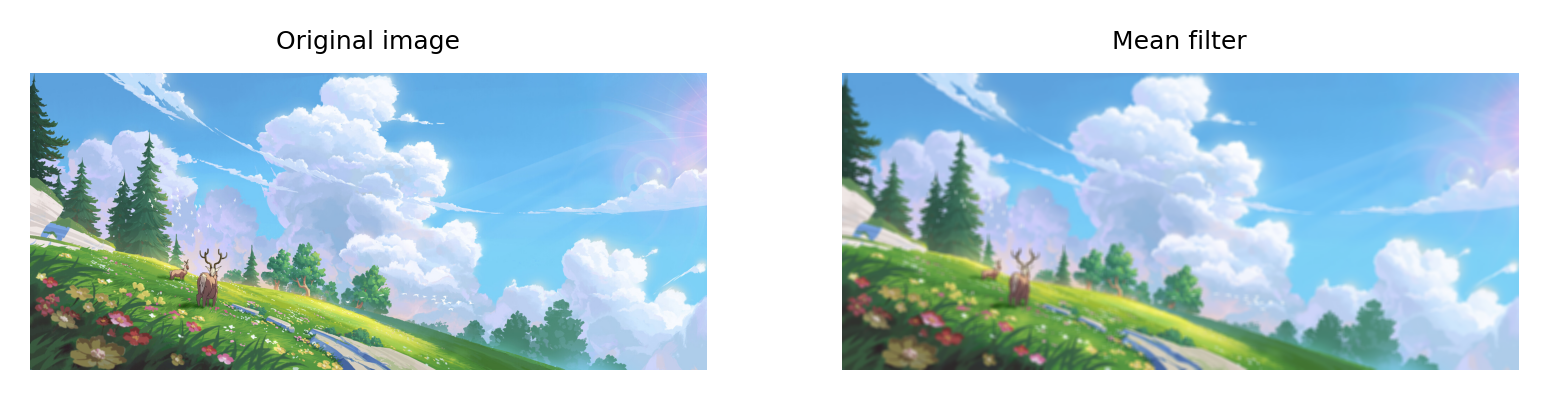

In [4]:
# LỌC TRUNG BÌNH với kernel 11x11
img = cv2.imread('D:\HCMUTE\BTVN-XuLyAnh\Image\sky.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(dpi=300)
subf = plt.subplot(1,2,1); plt.imshow(img)
plt.axis('off'); subf.set_title("Original image")
k = np.ones((11,11))/(11*11)
imgOut = Conv(img,k)
subf = plt.subplot(1,2,2); plt.imshow(imgOut)
plt.axis('off'); subf.title.set_text('Mean filter')
plt.show()

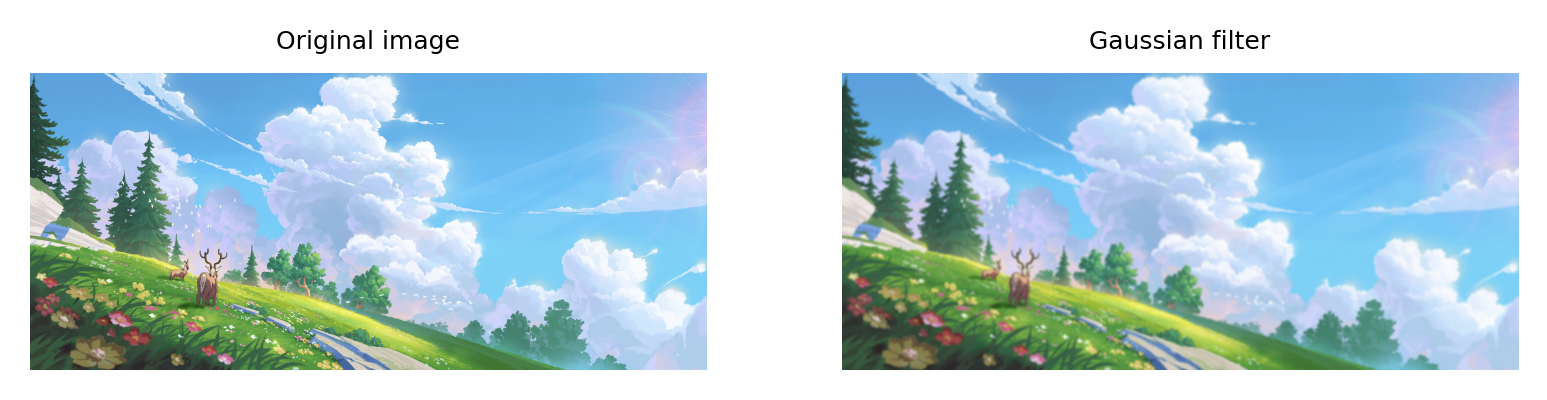

In [6]:
# LỌC Gaussian với kernel 11x11 và sig=3
img = cv2.imread('D:\HCMUTE\BTVN-XuLyAnh\Image\sky.jpg', cv2.IMREAD_COLOR)
img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(dpi=300)
subf=plt.subplot(1,2,1); plt.imshow(img)
plt.axis('off'); subf.set_title("Original image")
s=11;sig=3;
k=Gausskernel(s, sig)
imgOut=Conv(img,k)
subf=plt.subplot(1,2,2); plt.imshow(imgOut)
plt.axis('off'); subf.title.set_text('Gaussian filter')
plt.show()

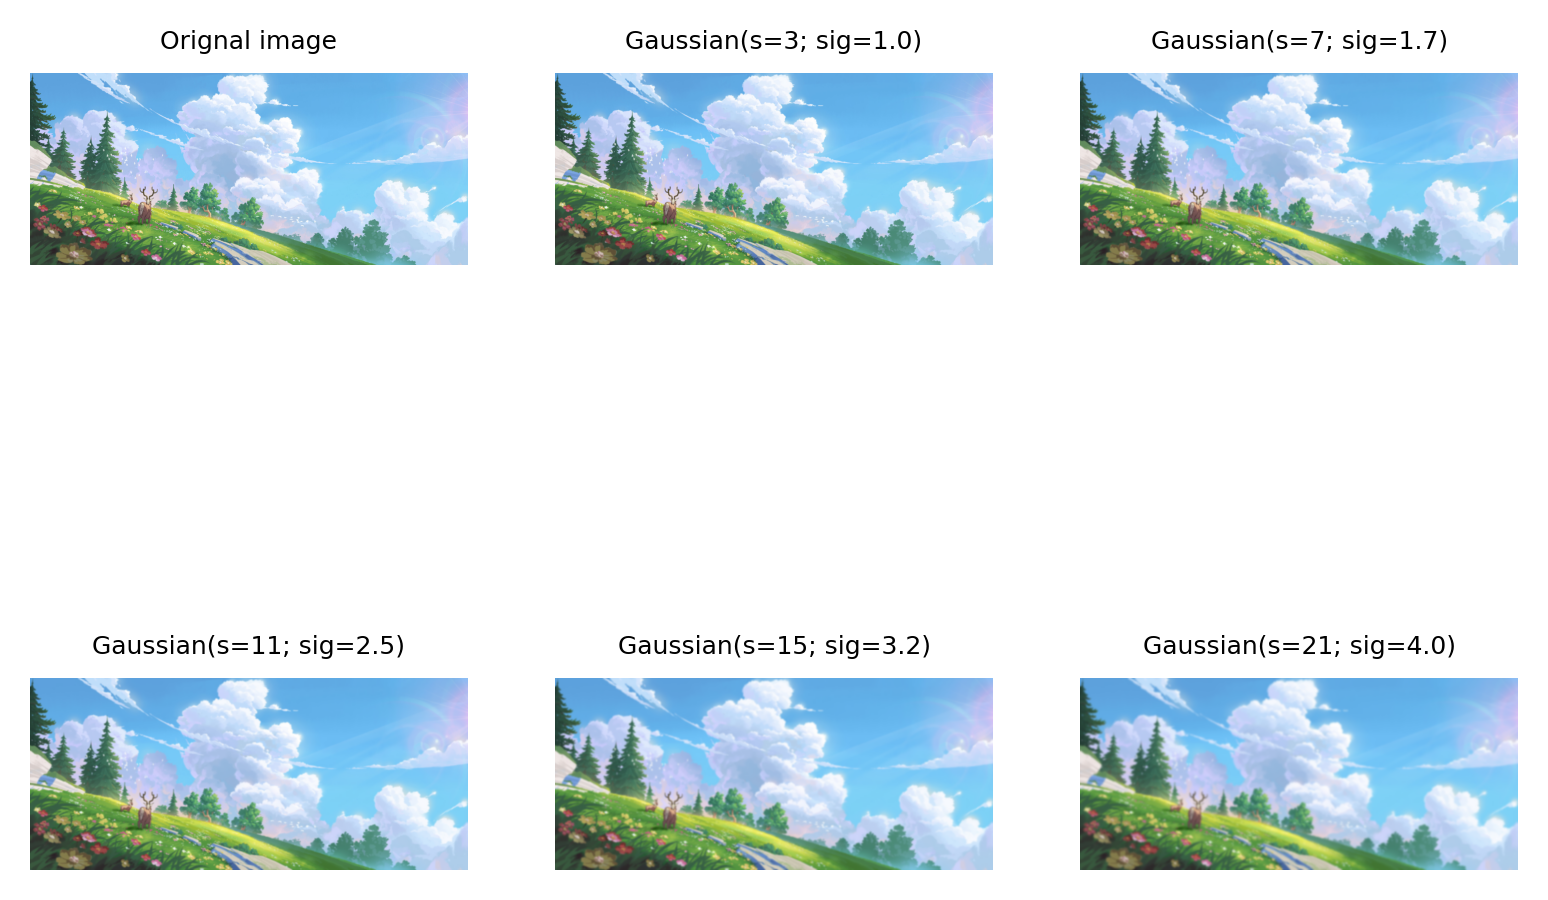

In [7]:
img = cv2.imread('D:\HCMUTE\BTVN-XuLyAnh\Image\sky.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
GauSig = np.linspace(1,4,5,endpoint=True)
ks = np.linspace(1,10,5,endpoint=True,dtype=int)*2+1
plt.figure(dpi=300)
subf = plt.subplot(2,3,1)
subf.imshow(img)
plt.axis('off'); subf.set_title("Orignal image")
for i,sig in enumerate(GauSig):
    k = Gausskernel(ks[i], sig)
    imgG = Conv(img,k)
    subf = plt.subplot(2,3,i+2)
    subf.imshow(imgG)
    subf.set_title('Gaussian(s='+str(ks[i])+'; sig='+
str(sig)[0:3]+')');
    subf.axis('off')

In [64]:
def conv(A, k):
    kh, kw = k.shape
    h, w = A.shape
    B = np.ones((h, w))
    for i in range(0, h - kh + 1):
        for j in range(0, w - kw + 1):
            sA = A[i:i + kh, j:j + kw]
            B[i, j] = np.sum(k * sA)
    B = B[0:h - kh + 1, 0:w - kw + 1]
    return B


def conv2(A, k, b=0):
    kh, kw = k.shape
    if b > 0:
        h, w = A.shape
        B = np.ones((h + kh - 1, w + kw - 1))
        th = int(kh / 2)
        tw = int(kw / 2)
        B[th:h + th, tw:w + tw] = A
        A = B
    h, w = A.shape
    C = np.ones((h, w))
    for i in range(0, h - kh + 1):
        for j in range(0, w - kw + 1):
            sA = A[i:i + kh, j:j + kw]
            C[i, j] = np.sum(k * sA)
    C = C[0:h - kh + 1, 0:w - kw + 1]
    return C

In [12]:
A = [[0, 50, 0, 29], [0, 80, 31, 2], [33, 90, 0, 75], [0, 9, 0, 95]]
k = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

A = np.array(A, dtype=float)
k = np.array(k, dtype=float)

# Tính kết quả của phép tích chập bằng hàm conv
result_conv = conv(A, k)
print("Kết quả của phép tích chập (conv):")
print(result_conv)

# Tính kết quả của phép tích chập bằng hàm convole của scipy
result_sci = convolve(A, k)
print("Kết quả của phép tích chập (sci):")
print(result_sci)

# Tính kết quả của phép tích chập bằng hàm filter2D của OpenCV
result_cv2 = cv2.filter2D(src=A, kernel=k, ddepth=-1)
print("Kết quả của phép tích chập (filter2D):")
print(result_cv2)

Kết quả của phép tích chập (conv):
[[  29. -192.]
 [ -35.  -22.]]
Kết quả của phép tích chập (sci):
[[-230.  -31.  141.  -58.]
 [-267.  -29.  192.  -46.]
 [-203.   35.   22. -216.]
 [ -84.   33. -243. -360.]]
Kết quả của phép tích chập (filter2D):
[[   0.   62. -198.    0.]
 [   0.   29. -192.    0.]
 [   0.  -35.  -22.    0.]
 [   0.  -66.  142.    0.]]


False


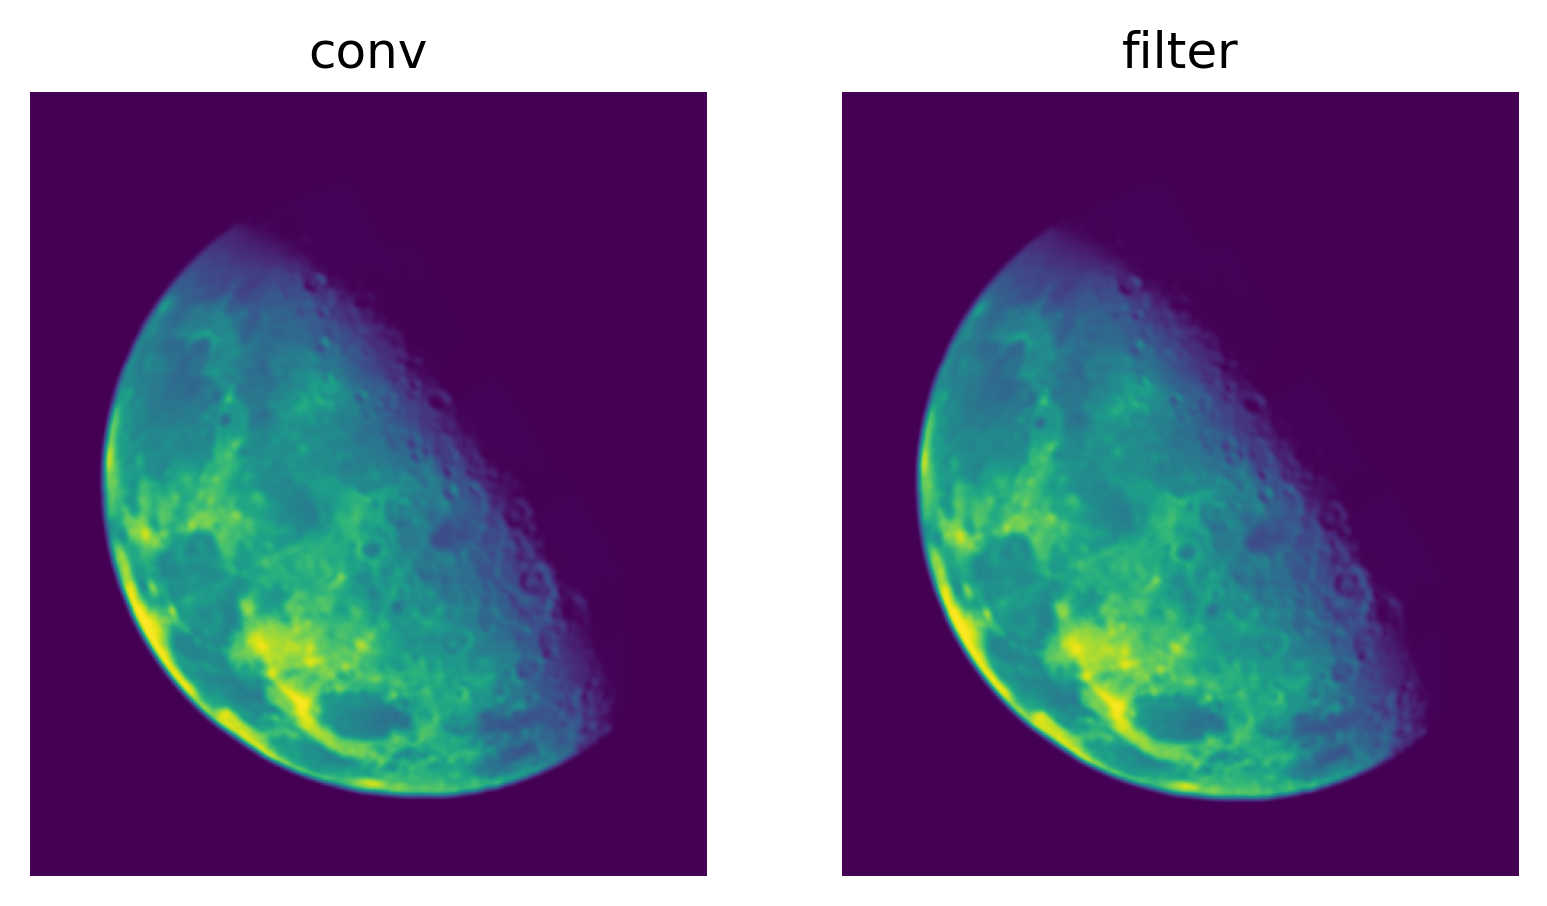

In [35]:
img = cv2.imread('D:\HCMUTE\BTVN-XuLyAnh\Image\\northmoon.png', 0)

k = np.ones((5,5))/25
img_conv = conv(img, k)

plt.figure(dpi=300)
subf = plt.subplot(1,2,1)
plt.imshow(img_conv)
plt.axis('off'); subf.set_title('conv')

img_filter = cv2.filter2D(src=img, kernel=k, ddepth=-1)

subf = plt.subplot(1,2,2)
plt.imshow(img_filter)
plt.axis('off'); subf.set_title('filter')

print(np.allclose(img_conv, img_filter))

plt.show()

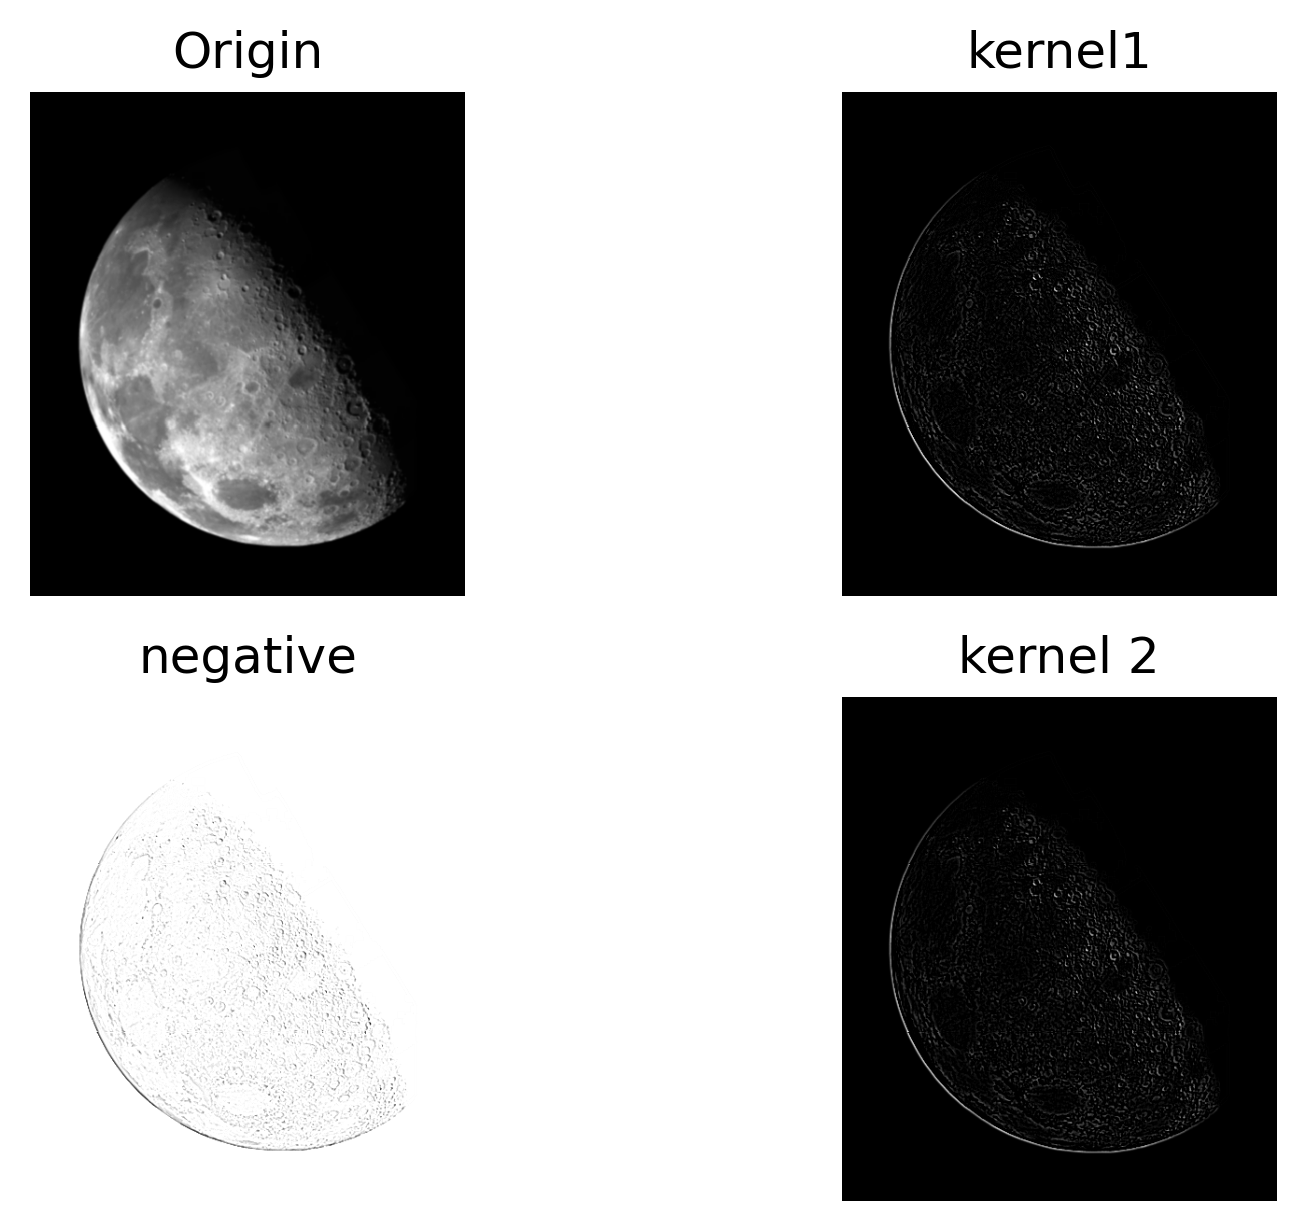

In [116]:
# Lọc Laplacian
img = cv2.imread('D:\HCMUTE\BTVN-XuLyAnh\Image\\northmoon.png', 0)

plt.figure(dpi=300)

# Origin
subf = plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.axis('off')
subf.set_title('Origin')

# Laplacian for
## kernel 1
kernel = np.array([[0,1,0],
                   [1,-4,1],
                   [0,1,0]])
img_laplacian = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

subf = plt.subplot(2,2,2)
plt.imshow(img_laplacian, cmap='gray')
plt.axis('off')
subf.set_title('kernel1')

## negative kernel
kernel = np.array([[0,-1,0],
                   [-1,4,-1],
                   [0,-1,0]])
img_laplacian_neg = cv2.filter2D(src=img, ddepth=-1, kernel=kernel) * -1

subf = plt.subplot(2,2,3)
plt.imshow(img_laplacian_neg, cmap='gray')
plt.axis('off')
subf.set_title('negative')

## kernel2
kernel = np.array([[1,1,1],
                   [1,-8,1],
                   [1,1,1]])
img_laplacian = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)

subf = plt.subplot(2,2,4)
plt.imshow(img_laplacian, cmap='gray')
plt.axis('off')
subf.set_title('kernel 2')

plt.show()

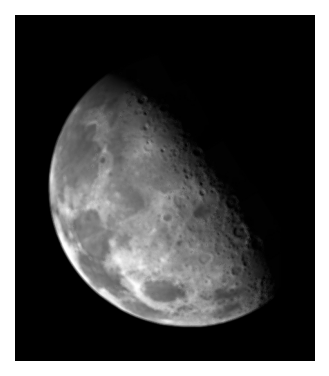

In [13]:
# filter Laplacian with clip in range (0,255)
c = 1
g = img + c * img_laplacian_neg
g_clip = np.clip(g, 0, 255)
plt.figure(figsize=(10,3), dpi=150)
plt.imshow(g_clip, cmap='gray')
plt.axis('off')
plt.show()

+ Laplacian làm sắc nét đường biên => img_lap
+ Hàm g = img + c * img_lap => img_lap + g = ảnh sắc nét

# Sobel
gx = conv(img, kx) => detect biên theo ngang
gy = conv(img, ky) => detect biên theo dọc
sobel = sqrt(gx**2 + gy**2)

show

out = sobel > 130
show (out)

Text(0.5, 1.0, 'sobel')

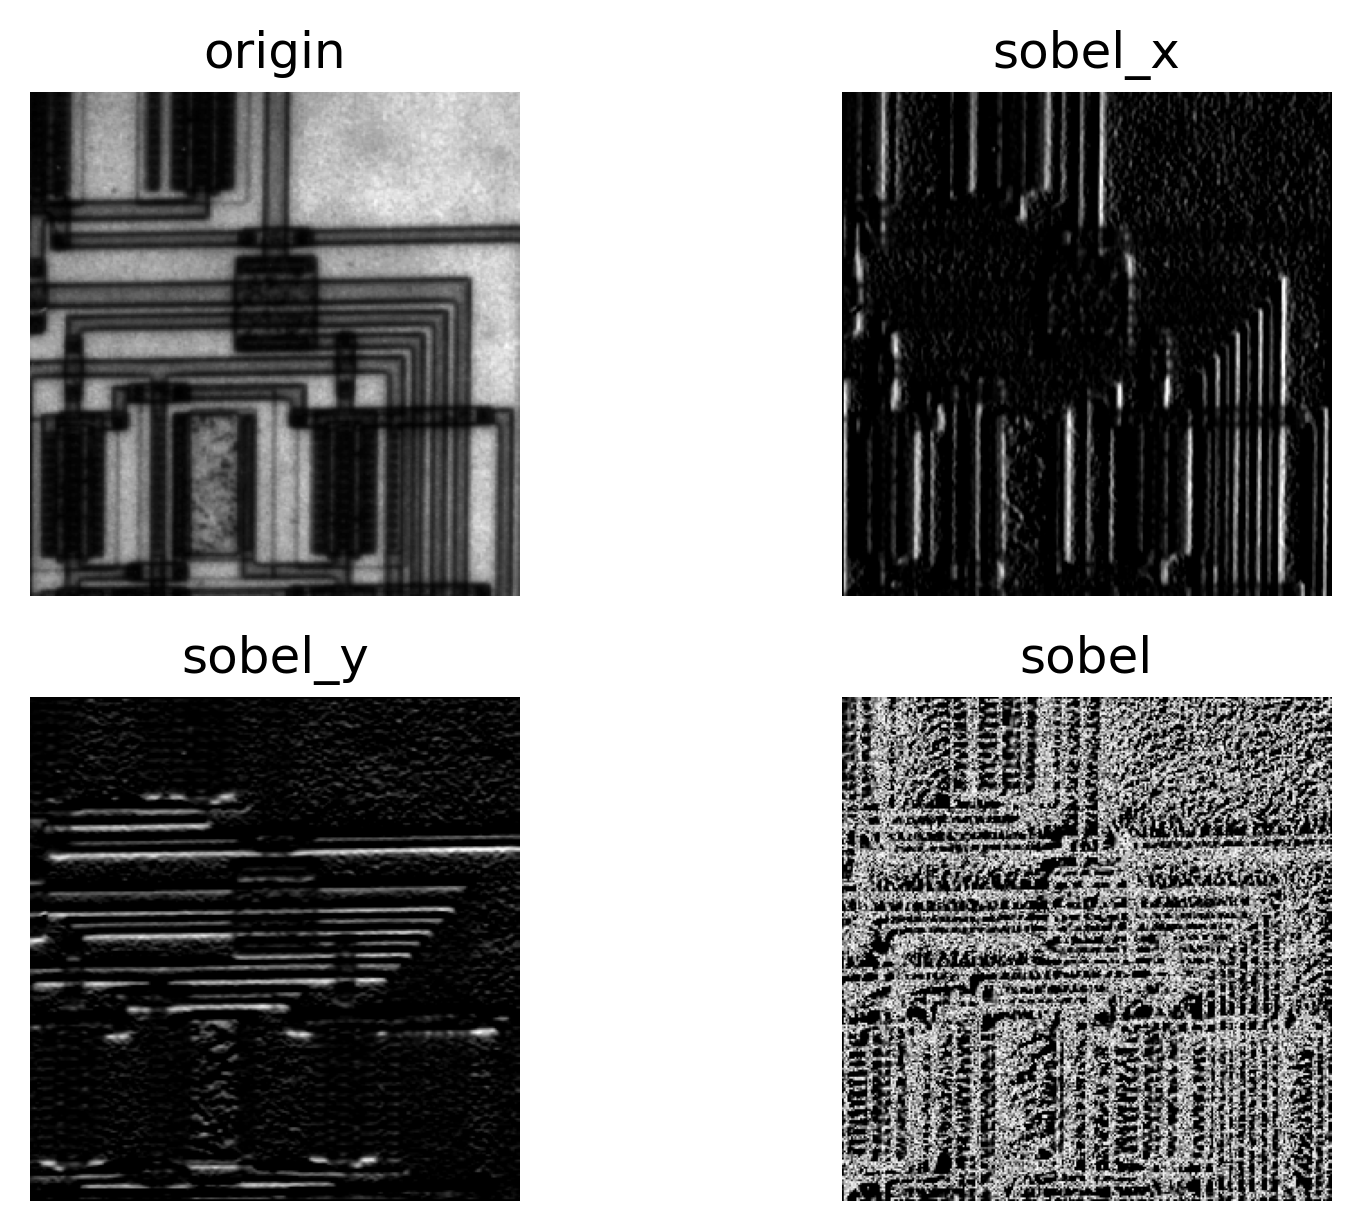

In [30]:
# Sobel filter
img = cv2.imread('D:\HCMUTE\BTVN-XuLyAnh\Image\\testpic\circuit.tif', 0)

plt.figure(dpi=300)

# kernel x, y
kx = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
ky = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
# original image
subf = plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.axis('off')
subf.set_title('origin')

#horizontal detection
img_sobel_x = cv2.filter2D(src=img, kernel=kx, ddepth=-1)
subf = plt.subplot(2,2,2)
plt.imshow(img_sobel_x, cmap='gray')
plt.axis('off')
subf.set_title('sobel_x')

#vertical detection
img_sobel_y = cv2.filter2D(src=img, kernel=ky, ddepth=-1)
subf = plt.subplot(2,2,3)
plt.imshow(img_sobel_y, cmap='gray')
plt.axis('off')
subf.set_title('sobel_y')

#full detection
img_sobel = np.sqrt(np.square(img_sobel_x) + np.square(img_sobel_y))
#img_sobel = img_sobel_x + img_sobel_y
#img_sobel[img_sobel != 0] = 255
subf = plt.subplot(2,2,4)
plt.imshow(img_sobel, cmap='gray')
plt.axis('off')
subf.set_title('sobel')

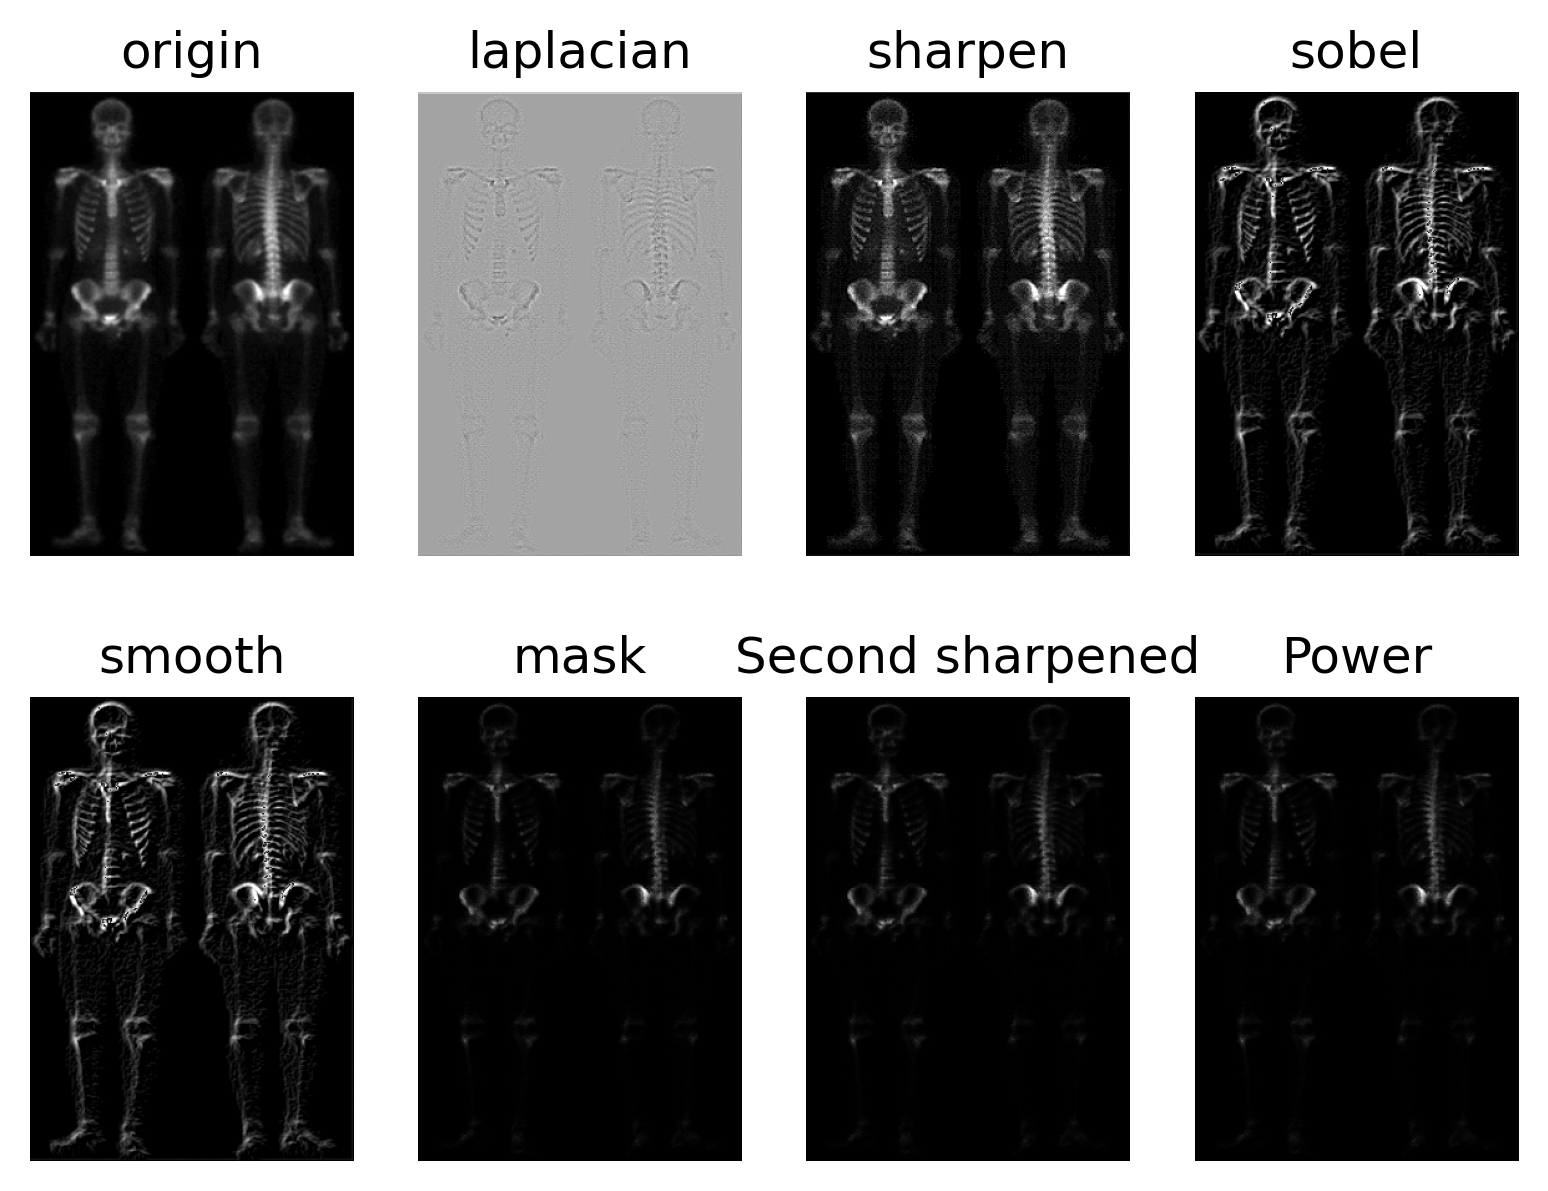

In [156]:
img = cv2.imread('D:\HCMUTE\BTVN-XuLyAnh\Image\\xray.jfif')

# converting to gray scale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(dpi=300)

# original image
subf = plt.subplot(2,4,1)
plt.axis('off')
plt.imshow(img, cmap='gray')
subf.set_title('origin')

# laplacian
kernel = np.array([[0,1,0],
                   [1,-4,1],
                   [0,1,0]], dtype=float)
img_ori = np.array(img, dtype=float)
img_laplacian = cv2.filter2D(src=img_ori, ddepth=-1, kernel=kernel)
img_laplacian = np.array(img_laplacian, dtype=float)
#img_laplacian = cv2.Laplacian(img, cv2.CV_64F)
subf = plt.subplot(2,4,2)
plt.axis('off'); plt.imshow(img_laplacian, cmap='gray')
subf.set_title('laplacian')

# sharpening by add origin with laplacian
g = img_ori + -1*img_laplacian
g = np.clip(g, 0,255)
subf = plt.subplot(2,4,3)
plt.axis('off'); plt.imshow(g, cmap='gray')
subf.set_title('sharpen')

# sobel
#horizontal detection
img_sobel_x = cv2.filter2D(src=img, kernel=kx, ddepth=-1)
#vertical detection
img_sobel_y = cv2.filter2D(src=img, kernel=ky, ddepth=-1)
#full detection
img_sobel = np.abs(img_sobel_x) + np.abs(img_sobel_y)
subf = plt.subplot(2,4,4)
plt.imshow(img_sobel, cmap='gray')
plt.axis('off')
subf.set_title('sobel')

# smooth by mean filter
kernel_mean = np.ones((5,5))/25
img_mean = cv2.filter2D(img_sobel, kernel=kernel_mean, ddepth=-1)
subf = plt.subplot(2,4,5)
plt.imshow(img_sobel, cmap='gray')
plt.axis('off')
subf.set_title('smooth')

# Product sharpen and smooth (mean)
img_mask = g * img_mean
subf = plt.subplot(2,4,6)
plt.imshow(img_mask, cmap='gray')
plt.axis('off')
subf.set_title('mask')

# Second sharpen
img_sharpen2 = img + img_mask
subf = plt.subplot(2,4,7)
plt.imshow(img_sharpen2, cmap='gray')
plt.axis('off')
subf.set_title('Second sharpened')

# Power law
gamma = 1
image_normalized = img_sharpen2.astype(float) / 255.0
c = 6
img_gamma = c * np.power(image_normalized, gamma)
img_gamma = (img_gamma * 255)
subf = plt.subplot(2,4,8)
plt.imshow(img_gamma, cmap='gray')
plt.axis('off')
subf.set_title('Power')

plt.show()